In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [2]:
sns.set()

In [3]:
df = pd.read_csv('Cleaned/exploratory_data_analisis3.csv')
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace = True)

df.head()

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,"Pepsi, Nouveau goÃ»t !",en:france,"Eau gazÃ©ifiÃ©e, sucre, colorant caramel E150d...","E150d - Caramel au sulfite d'ammonium,E338 - A...",e,13.0,177.0,0.0,0.0,10.4,0.0,0.0,0.0254,10.4
1,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,7Up,en:france,"Eau gazÃ©ifiÃ©e, sucre, acidifiants (acide cit...","E330 - Acide citrique,E296 - Acide malique,E33...",e,13.0,177.0,0.0,0.0,10.4,0.1,0.0,0.1000,10.4
2,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Madeleines nature,en:france,"Farine de _blÃ©_, huile de colza, sucre, _oeuf...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,12.0,1900.0,23.0,2.5,55.0,1.5,6.0,0.6600,26.0
3,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes Raisins,en:france,"Farine de _blÃ©_, _Åufs_ frais, huile de colz...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,13.0,1768.0,19.0,2.5,56.0,1.8,5.8,0.6500,28.0
4,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes aux Fruits,en:france,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...","E202 - Sorbate de potassium,E220 - Anhydride s...",d,12.0,1670.0,15.0,2.0,60.0,1.5,4.9,0.6000,34.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37795 entries, 0 to 37794
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      37795 non-null  object 
 1   pnns_groups_1            37795 non-null  object 
 2   product_name             37705 non-null  object 
 3   countries_tags           37795 non-null  object 
 4   ingredients_text         33499 non-null  object 
 5   additives_fr             20282 non-null  object 
 6   nutrition_grade_fr       37795 non-null  object 
 7   nutrition-score-fr_100g  37795 non-null  float64
 8   energy_100g              37795 non-null  float64
 9   fat_100g                 37795 non-null  float64
 10  saturated-fat_100g       37795 non-null  float64
 11  carbohydrates_100g       37795 non-null  float64
 12  fiber_100g               37795 non-null  float64
 13  proteins_100g            37795 non-null  float64
 14  salt_100g             

# Preprocessing

Objectif : Transformer la donnée pour la mettre dans un format propice au machine learning

- Creation d'un train set / test set 
- Elimination des nan
- Encodage
- Supression des outliers
- Feature selection 
- Feature engineering
- Feature Scaling
    
    

encodage, normalisation, imputation, selection, extraction.

- librairie sklearn.preprocessing :  type d'encodage a essayé : LabelEncoder(),OrdinalEncoder(),one hot, binary.
- librairie sklearn.impute(pour imputation)
- librairie sklearn feature_selection (pour la selection)
- librairie sklearn feature _extraction (pour extraction)



## 1 Analyse univarié 

Text(0.5, 1.0, 'salt')

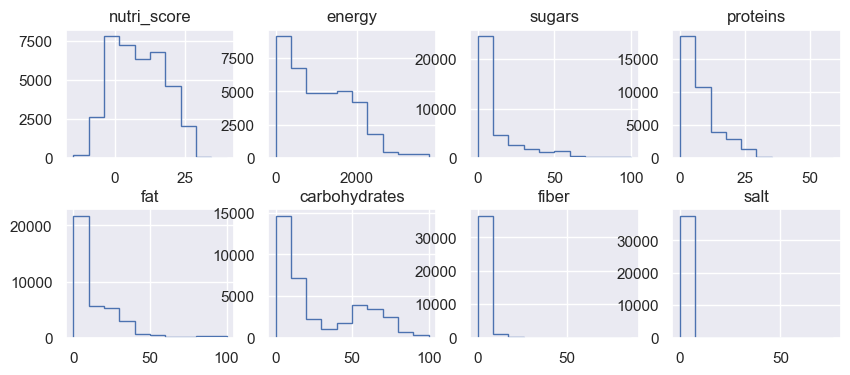

In [5]:
#data['nutrition_grade_fr'][2697] = 'd'
#data['nutrition_grade_fr'][16134] = 'd'
#nutri_E = data.loc[data['nutrition_grade_fr'] == 'a']
#nutri_E.sort_values('nutrition-score-fr_100g')
# analyse univarié
fig, ax = plt.subplots(2,4,figsize= (10,4))
fig.subplots_adjust(hspace=0.4)
ax[0][0].hist(df['nutrition-score-fr_100g'],histtype='step')
ax[0][0].set_title('nutri_score')
ax[0][1].hist(df['energy_100g'],histtype='step')
ax[0][1].set_title('energy')
ax[0][2].hist(df['sugars_100g'], histtype='step')
ax[0][2].set_title('sugars')
ax[0][3].hist(df['proteins_100g'], histtype='step')
ax[0][3].set_title('proteins')
ax[1][0].hist(df['fat_100g'], histtype='step')
ax[1][0].set_title('fat')
ax[1][1].hist(df['carbohydrates_100g'], histtype='step')
ax[1][1].set_title('carbohydrates')
ax[1][2].hist(df['fiber_100g'], histtype='step')
ax[1][2].set_title('fiber')
ax[1][3].hist(df['salt_100g'], histtype='step')
ax[1][3].set_title('salt')

## Nutriscore
### Produit solide 
- pour un produit avec la lettre e le nutriscore est compris entre 19 et 40
- pour un produit avec la lettre d le nutriscore est compris entre 11 et 18
- pour un produit avec la lettre c le nutriscore est compris entre 3 et 10
- pour un produit avec la lettre b le nutriscore est compris entre 0 et 2
- pour un produit avec la lettre a le nutriscore est compris entre min et -1

### Boisson
- pour un produit avec la lettre e le nutriscore est compris entre 10 et Max
- pour un produit avec la lettre d le nutriscore est compris entre 6 et 9
- pour un produit avec la lettre c le nutriscore est compris entre 2 et 5
- pour un produit avec la lettre b le nutriscore est compris entre min et -1
- pour un produit avec la lettre a le nutriscore est compris entre eaéu minérale



## Apport journalier recommmandé par National Health Service

- Sucre 25 g 
- Energie 2400 à 2600 g
- protéine 1,5 g/kg/jour
- sel 5 g 

## Moyenne en pourcentage de glucide, lipide et proteine par jour

- glucide 55 % 
- lipide 25 %
- protéine 20 %

Attention : le nutriscore ne prend pas en compte la méthode de cuisson (ex : des frites pourraient avoir un nutriscore de A, il n'en demeure pas moins que lors de la friture et de l'assaisonement ; celui_ci penche pour un score proche de e)



In [6]:
df.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
count,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000
mean,8.273502,1097.326064,13.222597,5.381344,27.110065,2.101330,7.553552,0.849469,12.733887
std,9.107404,789.966937,16.967673,8.461580,27.128040,3.183807,7.268767,1.437607,18.403995
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000
25%,1.000000,391.000000,1.000000,0.200000,4.300000,0.000000,1.500000,0.051400,1.000000
50%,8.000000,1006.000000,6.600000,1.800000,13.300000,1.400000,6.000000,0.550000,4.000000
75%,15.000000,1650.000000,21.900000,7.400000,53.000000,2.700000,10.800000,1.200000,15.400000
max,40.000000,3772.000000,100.000000,100.000000,100.000000,86.200000,58.800000,76.200000,100.000000


In [7]:
df

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,"Pepsi, Nouveau goÃ»t !",en:france,"Eau gazÃ©ifiÃ©e, sucre, colorant caramel E150d...","E150d - Caramel au sulfite d'ammonium,E338 - A...",e,13.0,177.0,0.0,0.00,10.40,0.000,0.000,0.0254,10.40
1,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,7Up,en:france,"Eau gazÃ©ifiÃ©e, sucre, acidifiants (acide cit...","E330 - Acide citrique,E296 - Acide malique,E33...",e,13.0,177.0,0.0,0.00,10.40,0.100,0.000,0.1000,10.40
2,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Madeleines nature,en:france,"Farine de _blÃ©_, huile de colza, sucre, _oeuf...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,12.0,1900.0,23.0,2.50,55.00,1.500,6.000,0.6600,26.00
3,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes Raisins,en:france,"Farine de _blÃ©_, _Åufs_ frais, huile de colz...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,13.0,1768.0,19.0,2.50,56.00,1.800,5.800,0.6500,28.00
4,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes aux Fruits,en:france,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...","E202 - Sorbate de potassium,E220 - Anhydride s...",d,12.0,1670.0,15.0,2.00,60.00,1.500,4.900,0.6000,34.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37790,http://world-fr.openfoodfacts.org/produit/9606...,Sugary snacks,Spearmint sans sucres,en:france,"Ãdulcorants : sorbitol, sucralose, acÃ©sulfam...","E420 - Sorbitol,E955 - Sucralose,E950 - AcÃ©su...",c,4.0,1017.0,1.3,1.28,95.87,0.005,0.040,0.0050,0.12
37791,http://world-fr.openfoodfacts.org/produit/9611...,Sugary snacks,Fisherman's Friend Miel-Citron,en:france,"Ãdulcorants : sorbitols, sucralose, acÃ©sulfa...","E420 - Sorbitol,E955 - Sucralose,E950 - AcÃ©su...",b,2.0,1031.0,1.3,1.28,95.31,1.470,0.004,0.0010,0.10
37792,http://world-fr.openfoodfacts.org/produit/9778...,Salty snacks,Nature cheddar and red onion crisps,"en:france,en:united-kingdom",NaN,NaN,c,9.0,2155.0,30.3,3.40,51.00,5.600,7.800,1.3500,1.80
37793,http://world-fr.openfoodfacts.org/produit/9847...,Cereals and potatoes,Tartines craquantes bio au sarrasin,en:france,NaN,NaN,a,-4.0,1643.0,2.8,0.60,74.80,5.900,13.000,0.6800,2.60


<AxesSubplot:xlabel='carbohydrates_100g', ylabel='sugars_100g'>

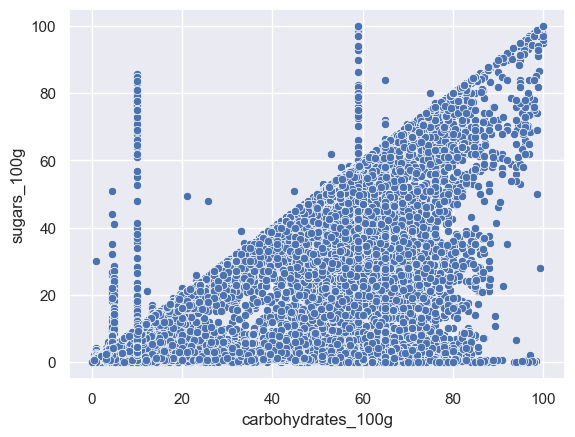

In [8]:
sns.scatterplot(data = df, x='carbohydrates_100g',y='sugars_100g' )

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='nutrition-score-fr_100g'>

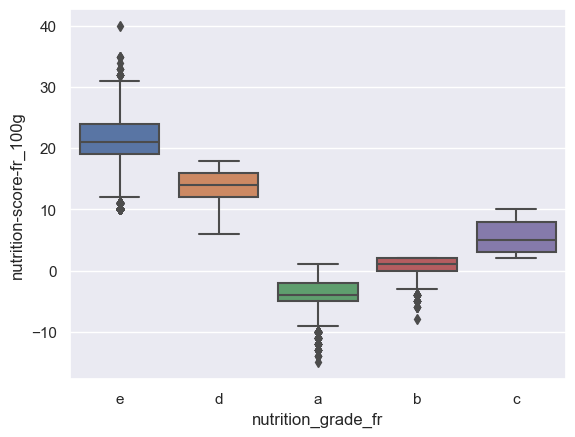

In [9]:
sns.boxplot(data= df,y='nutrition-score-fr_100g',x='nutrition_grade_fr')

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='energy_100g'>

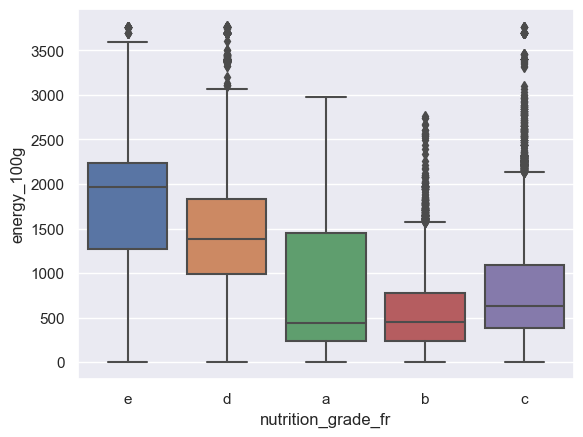

In [10]:
sns.boxplot(data= df,y='energy_100g',x='nutrition_grade_fr')

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='fat_100g'>

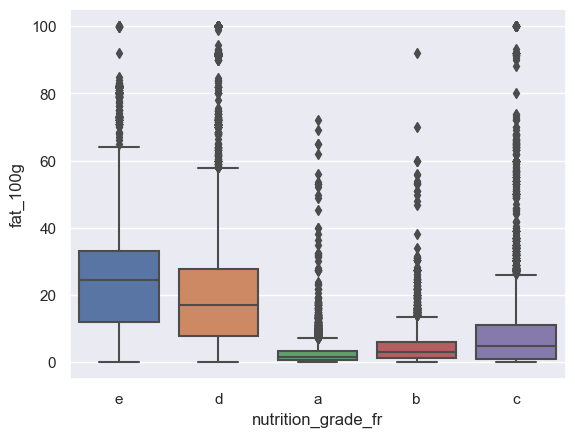

In [11]:
sns.boxplot(data= df,y='fat_100g',x='nutrition_grade_fr')

In [12]:
df.select_dtypes(include = np.number)


,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,13.0,177.0,0.0,0.00,10.40,0.000,0.000,0.0254,10.40
1,13.0,177.0,0.0,0.00,10.40,0.100,0.000,0.1000,10.40
2,12.0,1900.0,23.0,2.50,55.00,1.500,6.000,0.6600,26.00
3,13.0,1768.0,19.0,2.50,56.00,1.800,5.800,0.6500,28.00
4,12.0,1670.0,15.0,2.00,60.00,1.500,4.900,0.6000,34.00
...,...,...,...,...,...,...,...,...,...
37790,4.0,1017.0,1.3,1.28,95.87,0.005,0.040,0.0050,0.12
37791,2.0,1031.0,1.3,1.28,95.31,1.470,0.004,0.0010,0.10
37792,9.0,2155.0,30.3,3.40,51.00,5.600,7.800,1.3500,1.80
37793,-4.0,1643.0,2.8,0.60,74.80,5.900,13.000,0.6800,2.60


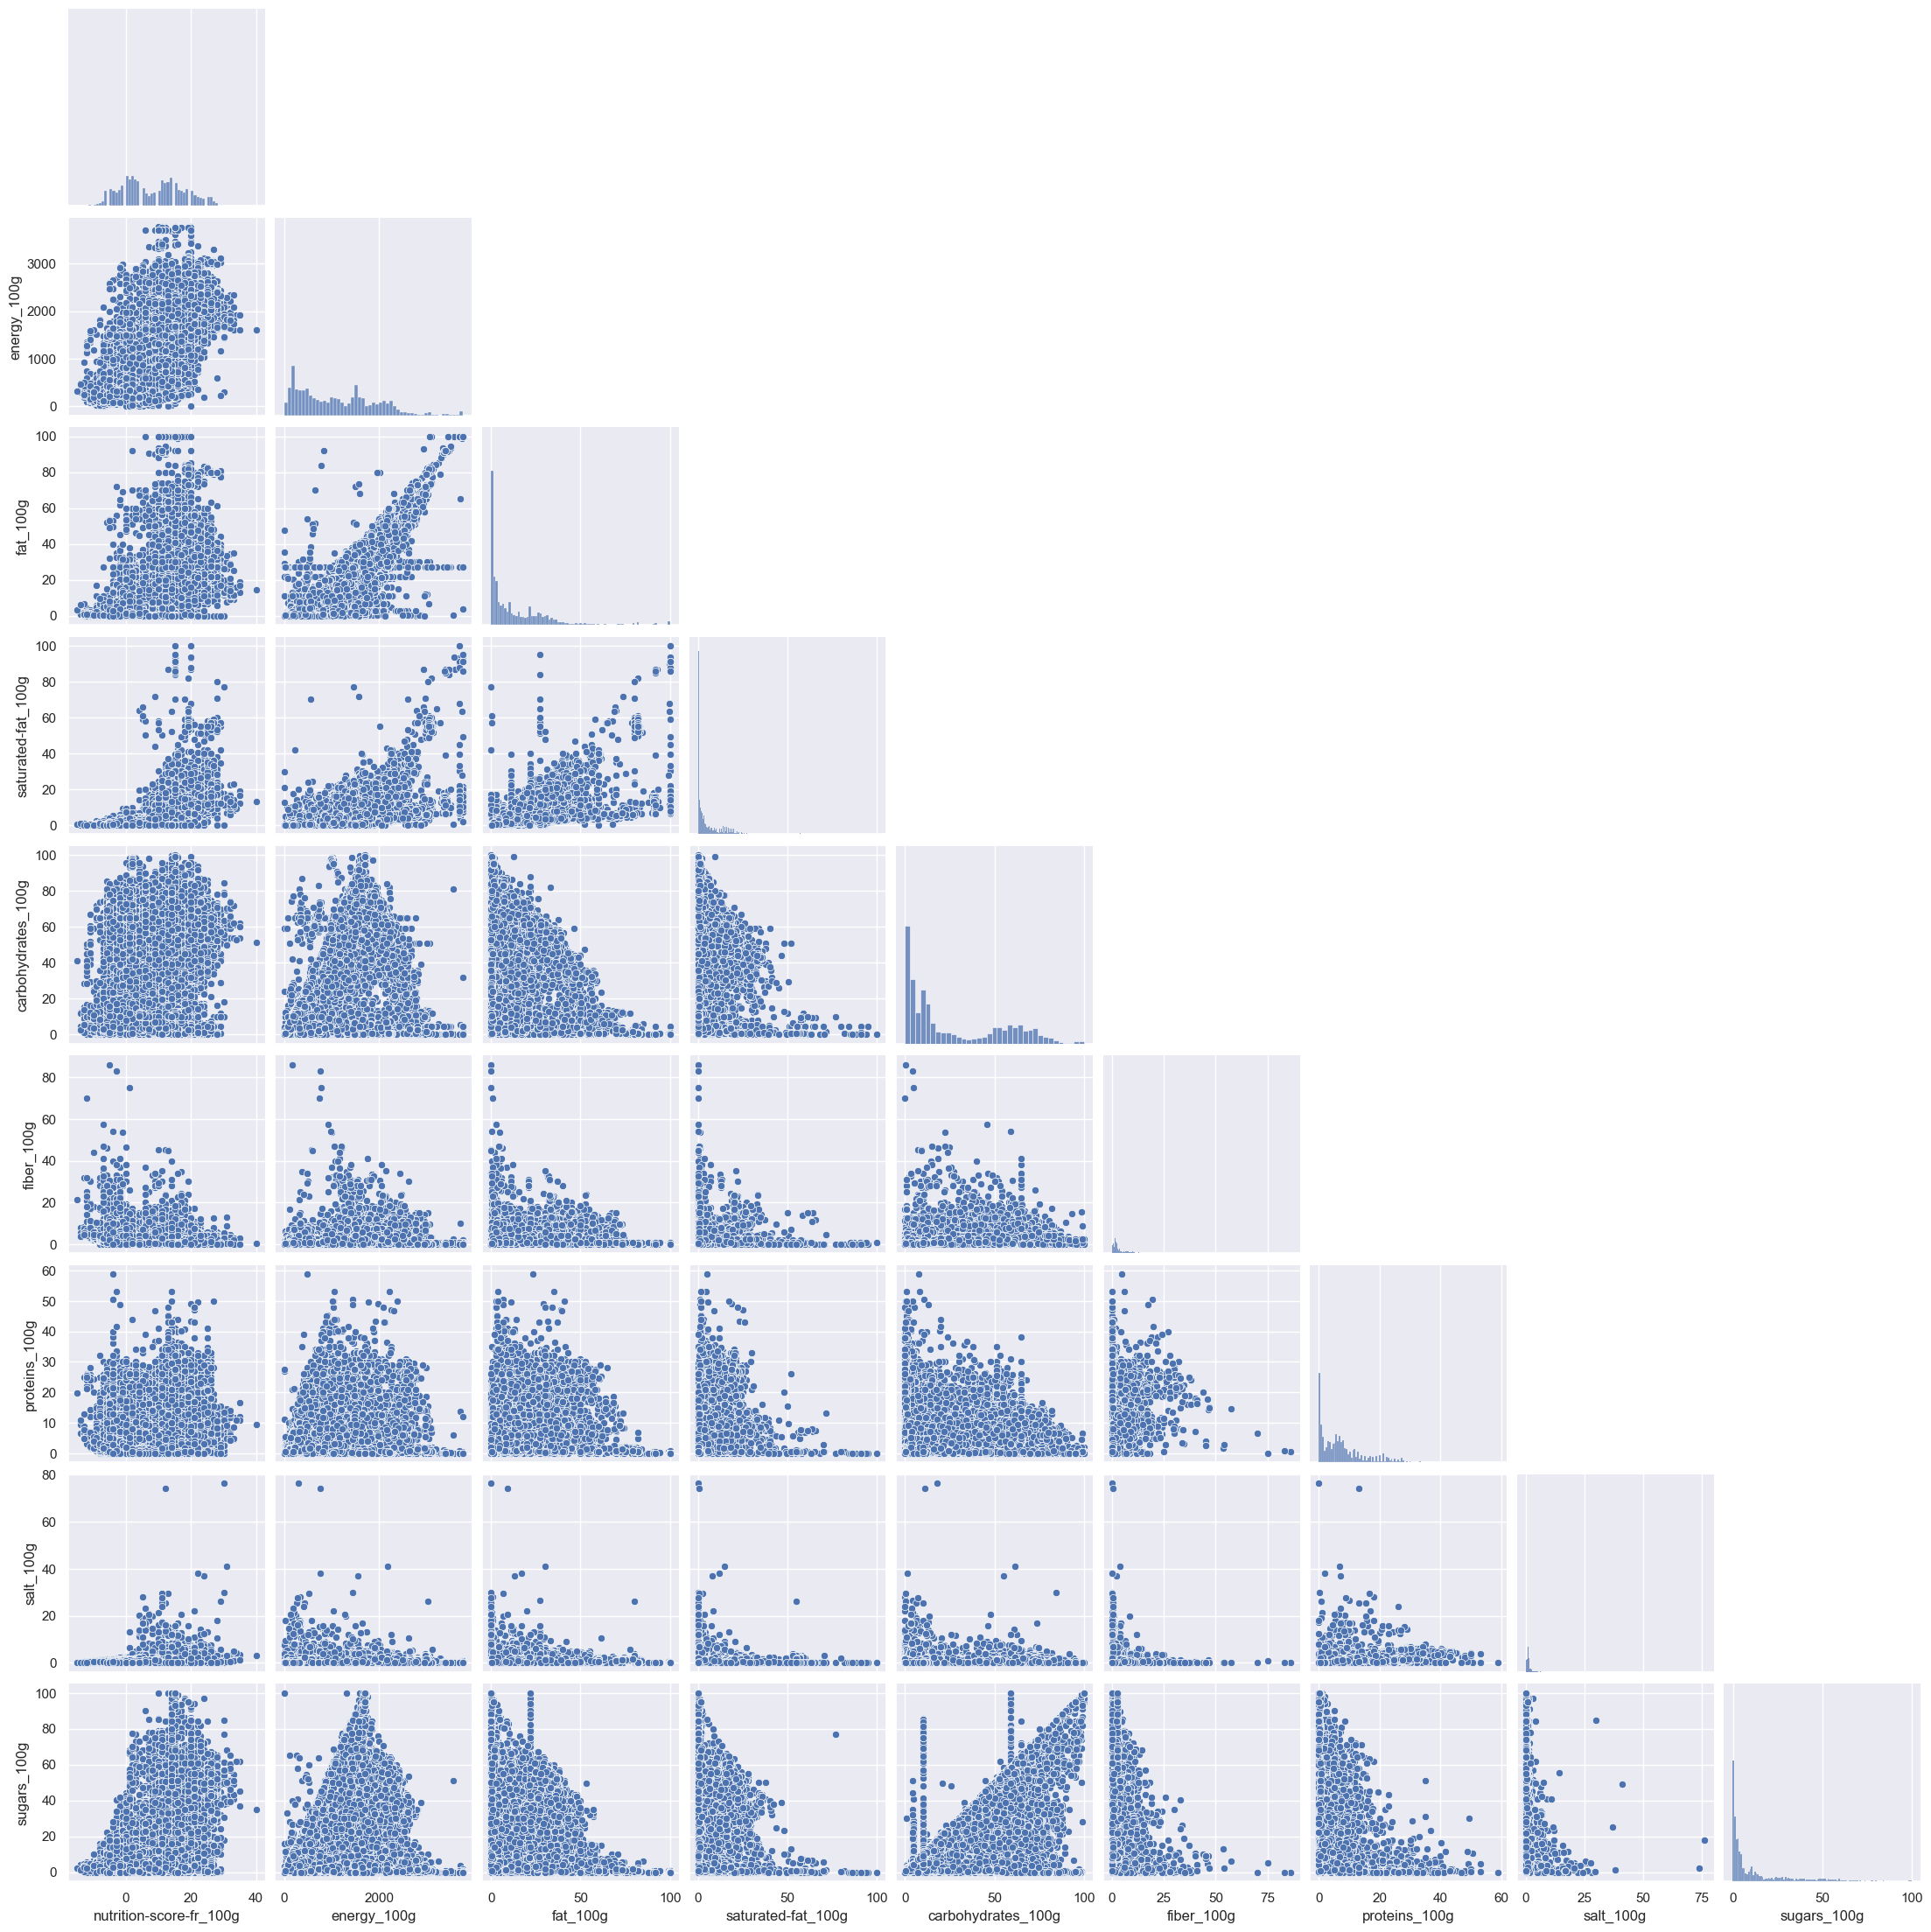

In [13]:
sns.pairplot(df.select_dtypes(include = np.number),corner=True)

## 2 Analyse bivarié

### 2.1 ANOVA


Confirmer avec le test statistique de shapiro que chaque variable quantitative suive une distribution normale. 

Faire le test de l'ANOVA (analyse de la variance) 
L'hypothèse nulle : les moyennes des nutrigradé sont égales pour chaque variable quantitative à expliquer.

Condition pour le test ANOVA (paramétrique) à un facteur : 

- Les écahntillons sont indépendant et ils sont issues d'une même population  
- La variable quantitative étudié doit suivre une loi normale

hypothèse alternative : La variable nutri_grade n'influance pas la variable quantitive (par exemple carbohydrate_100g)



Text(0.5, 1.0, 'variable energy')

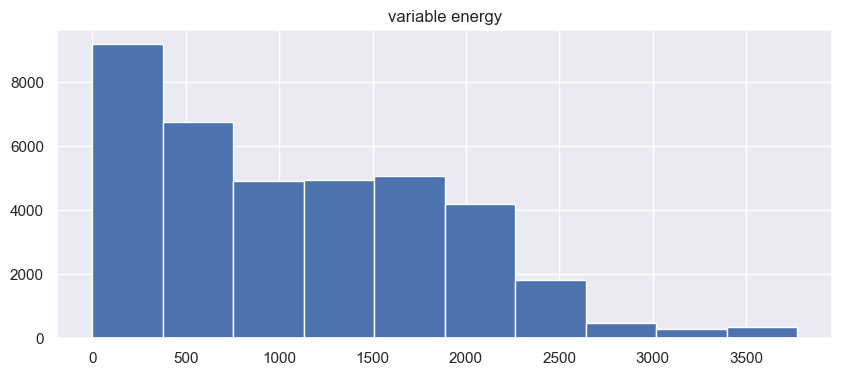

In [14]:
fig, ax = plt.subplots(figsize= (10,4))
fig.subplots_adjust(hspace=0.4)
ax.hist(df['energy_100g'])
ax.set_title('variable energy')

ShapiroResult(statistic=0.9487996101379395, pvalue=3.9051834682668485e-12)

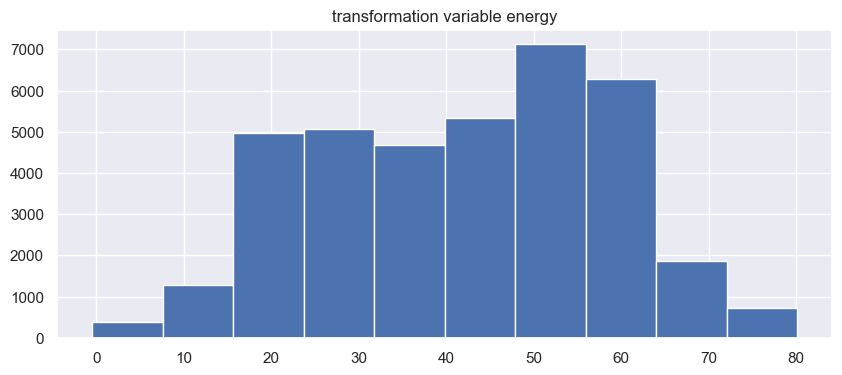

In [16]:
import scipy

tr_energy = df[df['energy_100g']>0]
tr_energy,_ = scipy.stats.boxcox(tr_energy['energy_100g'])
fig, ax = plt.subplots(figsize= (10,4))
fig.subplots_adjust(hspace=0.4)
ax.hist(tr_energy)
ax.set_title('transformation variable energy')
scipy.stats.shapiro(tr_energy[:500])

In [19]:
# Hypothène nulles : chaque variable suit la loi normale.
print(f'\n result nutrition-score-fr_100g :' ,{scipy.stats.shapiro(df['nutrition-score-fr_100g'])},
      ',\n result energy_100g :',{scipy.stats.shapiro(df['energy_100g'])},
      ',\n result fat_100g :',{scipy.stats.shapiro(df['fat_100g'])},
      ',\n result saturated_fat_100g :',{scipy.stats.shapiro(df['saturated-fat_100g'])},
      ',\n result carbohydrates_100g :',{scipy.stats.shapiro(df['carbohydrates_100g'])},
      ',\n result fiber_100g :',{scipy.stats.shapiro(df['fiber_100g'])},
      ',\n result proteins_100g :',{scipy.stats.shapiro(df['proteins_100g'])},
      ',\n result salt_100g :',{scipy.stats.shapiro(df['salt_100g'])},
      ',\n result sugars_100g :',{scipy.stats.shapiro(df['sugars_100g'])})


 result nutrition-score-fr_100g : {ShapiroResult(statistic=0.9735774993896484, pvalue=0.0)} ,
 result energy_100g : {ShapiroResult(statistic=0.9392611980438232, pvalue=0.0)} ,
 result fat_100g : {ShapiroResult(statistic=0.7511515617370605, pvalue=0.0)} ,
 result saturated_fat_100g : {ShapiroResult(statistic=0.6476395130157471, pvalue=0.0)} ,
 result carbohydrates_100g : {ShapiroResult(statistic=0.8443894386291504, pvalue=0.0)} ,
 result fiber_100g : {ShapiroResult(statistic=0.6026519536972046, pvalue=0.0)} ,
 result proteins_100g : {ShapiroResult(statistic=0.8695520162582397, pvalue=0.0)} ,
 result salt_100g : {ShapiroResult(statistic=0.4827679991722107, pvalue=0.0)} ,
 result sugars_100g : {ShapiroResult(statistic=0.7061316967010498, pvalue=0.0)}


C:\Users\Dragomir\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:


def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x:
        yi_classe = classe
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    # Le SCT calcul la variation totale
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    # Le SCE calcul la variation intraclasse 
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    

var_analyse = []

for cols in df.select_dtypes(include = np.number).columns:
    
    group1 = df[df['nutrition_grade_fr'] == 'a'][cols]
    group2 = df[df['nutrition_grade_fr'] == 'b'][cols]
    group3 = df[df['nutrition_grade_fr'] == 'c'][cols]
    group4 = df[df['nutrition_grade_fr'] == 'd'][cols]
    group5 = df[df['nutrition_grade_fr'] == 'e'][cols]

    x = [group1,group2,group3,group4,group5]
    

    var_analyse.append(eta_squared(x,df[cols]))

eta_squared(x,df['carbohydrates_100g'])


0.3649597963535444

<AxesSubplot:>

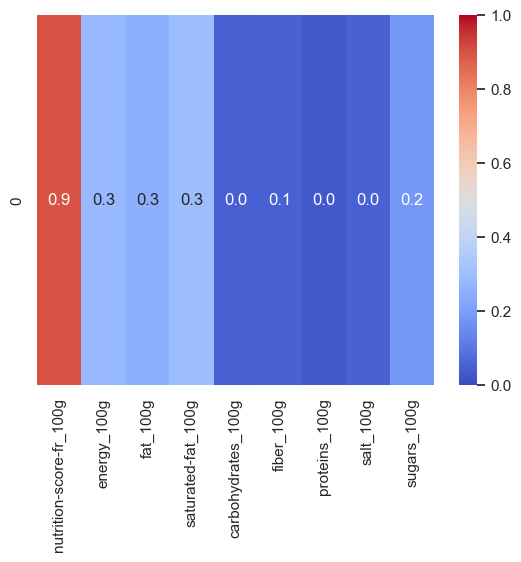

In [21]:
# analyse de la ralation entre la valuer nutri_grade et les valeurs quantitatives

var_analyse = np.array(var_analyse)


var_analyse= var_analyse.reshape(1,9)

sns.heatmap(data = pd.DataFrame(data = var_analyse, columns=df.select_dtypes(include = np.number).columns),annot=True,vmin=0,vmax=1,cmap='coolwarm',fmt='.1f')


In [23]:
# Test ANOVA non paramétrique à un facteur

def test_ANOVA(x,cols):
    
    P_VALUE = []
    f_value1, p_value1 = scipy.stats.kruskal(x[0],df[cols])
    P_VALUE.append(p_value1)
    print(f'variable cols : {cols}\n')
    
    print('Statistique F :', f_value1)
    print('p-value :', p_value1)

    f_value2, p_value2 = scipy.stats.kruskal(x[1],df[cols])

    print('Statistique F :', f_value2)
    print('p-value :', p_value2)

    f_value3, p_value3 = scipy.stats.kruskal(x[2],df[cols])

    print('Statistique F :', f_value3)
    print('p-value :', p_value3)

    f_value4, p_value4 = scipy.stats.kruskal(x[3],df[cols])

    print('Statistique F :', f_value4)
    print('p-value :', p_value4)

    f_value5, p_value5 = scipy.stats.kruskal(x[4],df[cols])

    print('Statistique F :', f_value5)
    print('p-value :', p_value5)
    print('\n\n')
    return P_VALUE

P_value = []

for cols in df.select_dtypes(include = np.number).columns:
    
    group1 = df[df['nutrition_grade_fr'] == 'a'][cols]
    group2 = df[df['nutrition_grade_fr'] == 'b'][cols]
    group3 = df[df['nutrition_grade_fr'] == 'c'][cols]
    group4 = df[df['nutrition_grade_fr'] == 'd'][cols]
    group5 = df[df['nutrition_grade_fr'] == 'e'][cols]

    x = [group1,group2,group3,group4,group5]
    
    test_ANOVA(x,cols)
    

variable cols : nutrition-score-fr_100g

Statistique F : 11648.289616803331
p-value : 0.0
Statistique F : 3409.071739088454
p-value : 0.0
Statistique F : 354.37908205645317
p-value : 4.715732065783705e-79
Statistique F : 3405.8368352295065
p-value : 0.0
Statistique F : 10439.900635637367
p-value : 0.0



variable cols : energy_100g

Statistique F : 1493.5599241802
p-value : 0.0
Statistique F : 2066.1901235831024
p-value : 0.0
Statistique F : 610.2468716463842
p-value : 9.886760761798222e-135
Statistique F : 1472.5601764995474
p-value : 0.0
Statistique F : 2990.3148816245875
p-value : 0.0



variable cols : fat_100g

Statistique F : 2923.8369151382935
p-value : 0.0
Statistique F : 1005.287029059442
p-value : 1.2736771452728646e-220
Statistique F : 268.0998238745469
p-value : 2.9447584680733823e-60
Statistique F : 1714.2777194746213
p-value : 0.0
Statistique F : 2081.707100202268
p-value : 0.0



variable cols : saturated-fat_100g

Statistique F : 3579.6259051720467
p-value : 0.0
Statist

In [25]:
# Test ANOVA paramétrique à un facteur

def test_ANOVA(x,cols):
    
    P_VALUE = []
    f_value1, p_value1 = scipy.stats.f_oneway(x[0],df[cols])
    P_VALUE.append(p_value1)
    print(f'variable cols : {cols}\n')
    
    print('Statistique F :', f_value1)
    print('p-value :', p_value1)

    f_value2, p_value2 = scipy.stats.f_oneway(x[1],df[cols])

    print('Statistique F :', f_value2)
    print('p-value :', p_value2)

    f_value3, p_value3 = scipy.stats.f_oneway(x[2],df[cols])

    print('Statistique F :', f_value3)
    print('p-value :', p_value3)

    f_value4, p_value4 = scipy.stats.f_oneway(x[3],df[cols])

    print('Statistique F :', f_value4)
    print('p-value :', p_value4)

    f_value5, p_value5 = scipy.stats.f_oneway(x[4],df[cols])

    print('Statistique F :', f_value5)
    print('p-value :', p_value5)
    print('\n\n')
    return P_VALUE

P_value = []

for cols in df.select_dtypes(include = np.number).columns:
    
    group1 = df[df['nutrition_grade_fr'] == 'a'][cols]
    group2 = df[df['nutrition_grade_fr'] == 'b'][cols]
    group3 = df[df['nutrition_grade_fr'] == 'c'][cols]
    group4 = df[df['nutrition_grade_fr'] == 'd'][cols]
    group5 = df[df['nutrition_grade_fr'] == 'e'][cols]

    x = [group1,group2,group3,group4,group5]
    
    test_ANOVA(x,cols)
    

variable cols : nutrition-score-fr_100g

Statistique F : 12310.784407562169
p-value : 0.0
Statistique F : 3506.1216327355346
p-value : 0.0
Statistique F : 730.9392908391228
p-value : 1.0088743378144327e-159
Statistique F : 3486.551429510265
p-value : 0.0
Statistique F : 13208.458211005078
p-value : 0.0



variable cols : energy_100g

Statistique F : 1540.3681292639517
p-value : 0.0
Statistique F : 2239.748828512122
p-value : 0.0
Statistique F : 746.4981327825702
p-value : 4.724803648890151e-163
Statistique F : 1368.1094150091578
p-value : 2.5397881291330235e-295
Statistique F : 3383.6599602173433
p-value : 0.0



variable cols : fat_100g

Statistique F : 2658.575585471962
p-value : 0.0
Statistique F : 1397.2272241946318
p-value : 5.590584353290561e-301
Statistique F : 415.7444411122524
p-value : 5.2809608693320505e-92
Statistique F : 1293.4081826578529
p-value : 1.5890219648024049e-279
Statistique F : 2535.667676240855
p-value : 0.0



variable cols : saturated-fat_100g

Statistique F 

In [26]:
df.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
count,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000,37795.000000
mean,8.273502,1097.326064,13.222597,5.381344,27.110065,2.101330,7.553552,0.849469,12.733887
std,9.107404,789.966937,16.967673,8.461580,27.128040,3.183807,7.268767,1.437607,18.403995
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000
25%,1.000000,391.000000,1.000000,0.200000,4.300000,0.000000,1.500000,0.051400,1.000000
50%,8.000000,1006.000000,6.600000,1.800000,13.300000,1.400000,6.000000,0.550000,4.000000
75%,15.000000,1650.000000,21.900000,7.400000,53.000000,2.700000,10.800000,1.200000,15.400000
max,40.000000,3772.000000,100.000000,100.000000,100.000000,86.200000,58.800000,76.200000,100.000000


<AxesSubplot:>

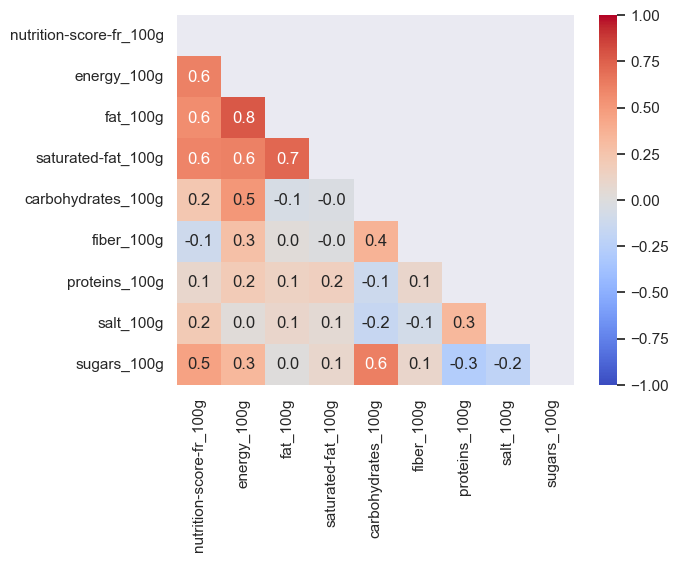

In [27]:
corr = df.corr().round(2)
mask = np.triu(corr)

sns.heatmap(data =corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)

## 3. Analyse Mulvariées

In [28]:
cols = ['nutrition-score-fr_100g','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g','sugars_100g']

In [29]:
df = df[cols]
df.isna().mean()

nutrition-score-fr_100g    0.0
energy_100g                0.0
fat_100g                   0.0
saturated-fat_100g         0.0
carbohydrates_100g         0.0
fiber_100g                 0.0
proteins_100g              0.0
salt_100g                  0.0
sugars_100g                0.0
dtype: float64

In [30]:
names = df.index
names

RangeIndex(start=0, stop=37795, step=1)

In [31]:
features = df.columns
features
df.iloc[:5,:5]

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g
0,13.0,177.0,0.0,0.0,10.4
1,13.0,177.0,0.0,0.0,10.4
2,12.0,1900.0,23.0,2.5,55.0
3,13.0,1768.0,19.0,2.5,56.0
4,12.0,1670.0,15.0,2.0,60.0


In [32]:
np.cov(df['nutrition-score-fr_100g'],df['energy_100g'])[0][1]/(df['nutrition-score-fr_100g'].std()*df['energy_100g'].std())

0.6129545306197167

In [33]:
df.corr().values

array([[ 1.        ,  0.61295453,  0.56388764,  0.59866997,  0.22744937,
        -0.11487555,  0.09136761,  0.21045705,  0.46299855],
       [ 0.61295453,  1.        ,  0.78490809,  0.60513507,  0.51148886,
         0.27670057,  0.20425825,  0.03298437,  0.3262465 ],
       [ 0.56388764,  0.78490809,  1.        ,  0.72301359, -0.05399518,
         0.02999771,  0.14051924,  0.09564106,  0.01085672],
       [ 0.59866997,  0.60513507,  0.72301359,  1.        , -0.0330082 ,
        -0.01338726,  0.15909681,  0.04574807,  0.08824941],
       [ 0.22744937,  0.51148886, -0.05399518, -0.0330082 ,  1.        ,
         0.364153  , -0.11869353, -0.16033817,  0.61660719],
       [-0.11487555,  0.27670057,  0.02999771, -0.01338726,  0.364153  ,
         1.        ,  0.10111196, -0.08242079,  0.09828529],
       [ 0.09136761,  0.20425825,  0.14051924,  0.15909681, -0.11869353,
         0.10111196,  1.        ,  0.32801457, -0.27762935],
       [ 0.21045705,  0.03298437,  0.09564106,  0.04574807, -0

In [34]:
scaler = StandardScaler()

In [35]:
X = df.values
scaler.fit(X)
df.values.shape

(37795, 9)

In [36]:
X_scaled = scaler.transform(X)
X_scaled.shape

(37795, 9)

In [37]:
X_scaled_df = pd.DataFrame(X_scaled)
corr =X_scaled_df.corr()
corr.values

array([[ 1.        ,  0.61295453,  0.56388764,  0.59866997,  0.22744937,
        -0.11487555,  0.09136761,  0.21045705,  0.46299855],
       [ 0.61295453,  1.        ,  0.78490809,  0.60513507,  0.51148886,
         0.27670057,  0.20425825,  0.03298437,  0.3262465 ],
       [ 0.56388764,  0.78490809,  1.        ,  0.72301359, -0.05399518,
         0.02999771,  0.14051924,  0.09564106,  0.01085672],
       [ 0.59866997,  0.60513507,  0.72301359,  1.        , -0.0330082 ,
        -0.01338726,  0.15909681,  0.04574807,  0.08824941],
       [ 0.22744937,  0.51148886, -0.05399518, -0.0330082 ,  1.        ,
         0.364153  , -0.11869353, -0.16033817,  0.61660719],
       [-0.11487555,  0.27670057,  0.02999771, -0.01338726,  0.364153  ,
         1.        ,  0.10111196, -0.08242079,  0.09828529],
       [ 0.09136761,  0.20425825,  0.14051924,  0.15909681, -0.11869353,
         0.10111196,  1.        ,  0.32801457, -0.27762935],
       [ 0.21045705,  0.03298437,  0.09564106,  0.04574807, -0

In [38]:
eigenvalues,eigenvectors = np.linalg.eig(corr.values)
eigenvectors

array([[-0.45760595, -0.04385257, -0.23866835,  0.33127257, -0.01741701,
        -0.70713619,  0.18500144, -0.29305749, -0.03894196],
       [-0.51919045,  0.04714918,  0.16704041, -0.10695934,  0.7109482 ,
         0.0651276 ,  0.1008916 ,  0.41110426, -0.0008137 ],
       [-0.45083509, -0.25910548, -0.0880589 , -0.3050702 , -0.55926956,
         0.20486277,  0.42021651,  0.24872835,  0.18865569],
       [-0.43070599, -0.23540017, -0.16787357, -0.24657343, -0.01288417,
         0.191773  , -0.71649608, -0.34519918, -0.02504237],
       [-0.22664858,  0.5359197 ,  0.24239801,  0.20918738, -0.41021051,
        -0.14604763, -0.41012887,  0.4412653 , -0.07988128],
       [-0.09617148,  0.25000222,  0.668243  , -0.30776674, -0.02247136,
        -0.12108303,  0.1058186 , -0.46890768,  0.37515704],
       [-0.09648014, -0.36543389,  0.53241038,  0.17423369, -0.11143698,
         0.09304088,  0.09176292, -0.09688401, -0.71024624],
       [-0.05144313, -0.37158872,  0.22831382,  0.67312594,  0

In [39]:
eigenvalues

array([3.19312695, 2.00652111, 1.26531091, 1.01183282, 0.02497662,
       0.19522005, 0.27502881, 0.42407084, 0.60391189])

Text(0.5, 1.0, 'les valeurs propres en fonction des facteurs')

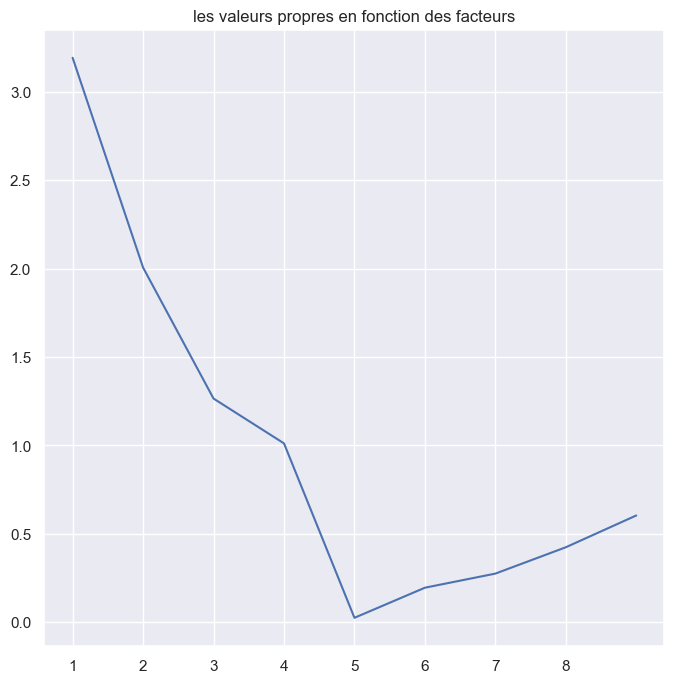

In [40]:
eigenvalues
fig, axes = plt.subplots(figsize = (8,8))
axes.set_xticks(np.arange(9))
axes.plot(range(1,10),eigenvalues)
plt.title("les valeurs propres en fonction des facteurs")

In [41]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.51898004, -1.16503387, -0.77929199, ..., -1.03919305,
        -0.57322995, -0.12681585],
       [ 0.51898004, -1.16503387, -0.77929199, ..., -1.03919305,
        -0.52133748, -0.12681585],
       [ 0.40917781,  1.01609892,  0.57624476, ..., -0.21373267,
        -0.13179617,  0.7208374 ],
       ...,
       [ 0.07977112,  1.33890151,  1.00648033, ...,  0.03390545,
         0.34817438, -0.59411187],
       [-1.34765787,  0.69076455, -0.61427012, ...,  0.74930444,
        -0.11788398, -0.55064247],
       [-0.68884449, -1.3625131 , -0.76750471, ..., -0.97040468,
        -0.57322995, -0.66474964]])

In [42]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
n_components = 5

In [44]:
pca = PCA(n_components=n_components)

In [45]:
pca.fit(X_scaled)

PCA(n_components=5)

In [46]:
pca.explained_variance_ratio_

array([0.35479188, 0.22294679, 0.1405901 , 0.11242587, 0.06710132])

In [47]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([35.48, 22.29, 14.06, 11.24,  6.71])

In [48]:
scree_cum = scree.cumsum().round()
scree_cum

array([35., 58., 72., 83., 90.])

In [49]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5]

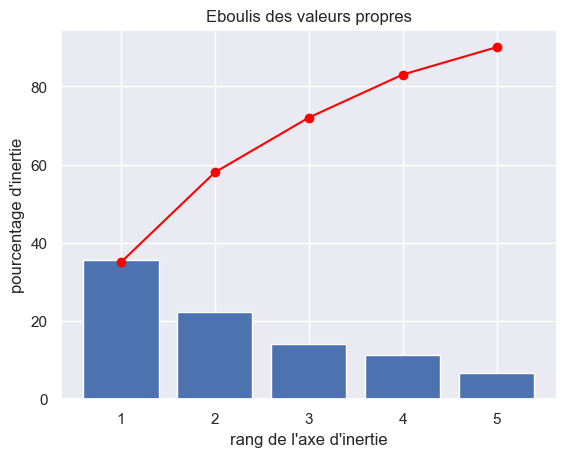

In [50]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [51]:
#La méthode des batons brisés
b_i = 1/np.arange(10,1,-1)
cumul_b_i = np.cumsum(b_i)
cumul_b_i = cumul_b_i[::-1]
pd.DataFrame({'val propre':eigenvalues,'Seuils':cumul_b_i})

,val propre,Seuils
0,3.193127,1.928968
1,2.006521,1.428968
2,1.265311,1.095635
3,1.011833,0.845635
4,0.024977,0.645635
5,0.195220,0.478968
6,0.275029,0.336111
7,0.424071,0.211111
8,0.603912,0.100000


In [52]:
pcs = pca.components_
pcs

array([[ 0.45760595,  0.51919045,  0.45083509,  0.43070599,  0.22664858,
         0.09617148,  0.09648014,  0.05144313,  0.24434563],
       [ 0.04385257, -0.04714918,  0.25910548,  0.23540017, -0.5359197 ,
        -0.25000222,  0.36543389,  0.37158872, -0.50197   ],
       [-0.23866835,  0.16704041, -0.0880589 , -0.16787357,  0.24239801,
         0.668243  ,  0.53241038,  0.22831382, -0.19571791],
       [ 0.33127257, -0.10695934, -0.3050702 , -0.24657343,  0.20918738,
        -0.30776674,  0.17423369,  0.67312594,  0.32096148],
       [-0.03894196, -0.0008137 ,  0.18865569, -0.02504237, -0.07988128,
         0.37515704, -0.71024624,  0.54050138, -0.13619652]])

In [53]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8
0,0.457606,0.519190,0.450835,0.430706,0.226649,0.096171,0.096480,0.051443,0.244346
1,0.043853,-0.047149,0.259105,0.235400,-0.535920,-0.250002,0.365434,0.371589,-0.501970
2,-0.238668,0.167040,-0.088059,-0.167874,0.242398,0.668243,0.532410,0.228314,-0.195718
3,0.331273,-0.106959,-0.305070,-0.246573,0.209187,-0.307767,0.174234,0.673126,0.320961
4,-0.038942,-0.000814,0.188656,-0.025042,-0.079881,0.375157,-0.710246,0.540501,-0.136197


In [54]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
F1,0.46,0.52,0.45,0.43,0.23,0.10,0.10,0.05,0.24
F2,0.04,-0.05,0.26,0.24,-0.54,-0.25,0.37,0.37,-0.50
F3,-0.24,0.17,-0.09,-0.17,0.24,0.67,0.53,0.23,-0.20
F4,0.33,-0.11,-0.31,-0.25,0.21,-0.31,0.17,0.67,0.32
F5,-0.04,-0.00,0.19,-0.03,-0.08,0.38,-0.71,0.54,-0.14


In [55]:
pcs.T

,F1,F2,F3,F4,F5
nutrition-score-fr_100g,0.457606,0.043853,-0.238668,0.331273,-0.038942
energy_100g,0.519190,-0.047149,0.167040,-0.106959,-0.000814
fat_100g,0.450835,0.259105,-0.088059,-0.305070,0.188656
saturated-fat_100g,0.430706,0.235400,-0.167874,-0.246573,-0.025042
carbohydrates_100g,0.226649,-0.535920,0.242398,0.209187,-0.079881
fiber_100g,0.096171,-0.250002,0.668243,-0.307767,0.375157
proteins_100g,0.096480,0.365434,0.532410,0.174234,-0.710246
salt_100g,0.051443,0.371589,0.228314,0.673126,0.540501
sugars_100g,0.244346,-0.501970,-0.195718,0.320961,-0.136197


In [56]:
# les vecteurs propres représente les variables sur les différents plans factoriel
eigenvectors = -1*eigenvectors
eigenvectors

array([[ 0.45760595,  0.04385257,  0.23866835, -0.33127257,  0.01741701,
         0.70713619, -0.18500144,  0.29305749,  0.03894196],
       [ 0.51919045, -0.04714918, -0.16704041,  0.10695934, -0.7109482 ,
        -0.0651276 , -0.1008916 , -0.41110426,  0.0008137 ],
       [ 0.45083509,  0.25910548,  0.0880589 ,  0.3050702 ,  0.55926956,
        -0.20486277, -0.42021651, -0.24872835, -0.18865569],
       [ 0.43070599,  0.23540017,  0.16787357,  0.24657343,  0.01288417,
        -0.191773  ,  0.71649608,  0.34519918,  0.02504237],
       [ 0.22664858, -0.5359197 , -0.24239801, -0.20918738,  0.41021051,
         0.14604763,  0.41012887, -0.4412653 ,  0.07988128],
       [ 0.09617148, -0.25000222, -0.668243  ,  0.30776674,  0.02247136,
         0.12108303, -0.1058186 ,  0.46890768, -0.37515704],
       [ 0.09648014,  0.36543389, -0.53241038, -0.17423369,  0.11143698,
        -0.09304088, -0.09176292,  0.09688401,  0.71024624],
       [ 0.05144313,  0.37158872, -0.22831382, -0.67312594, -0

In [57]:
np.var(df['nutrition-score-fr_100g'])
np.var(X_scaled[1,:])

0.22338810725018943

<AxesSubplot:>

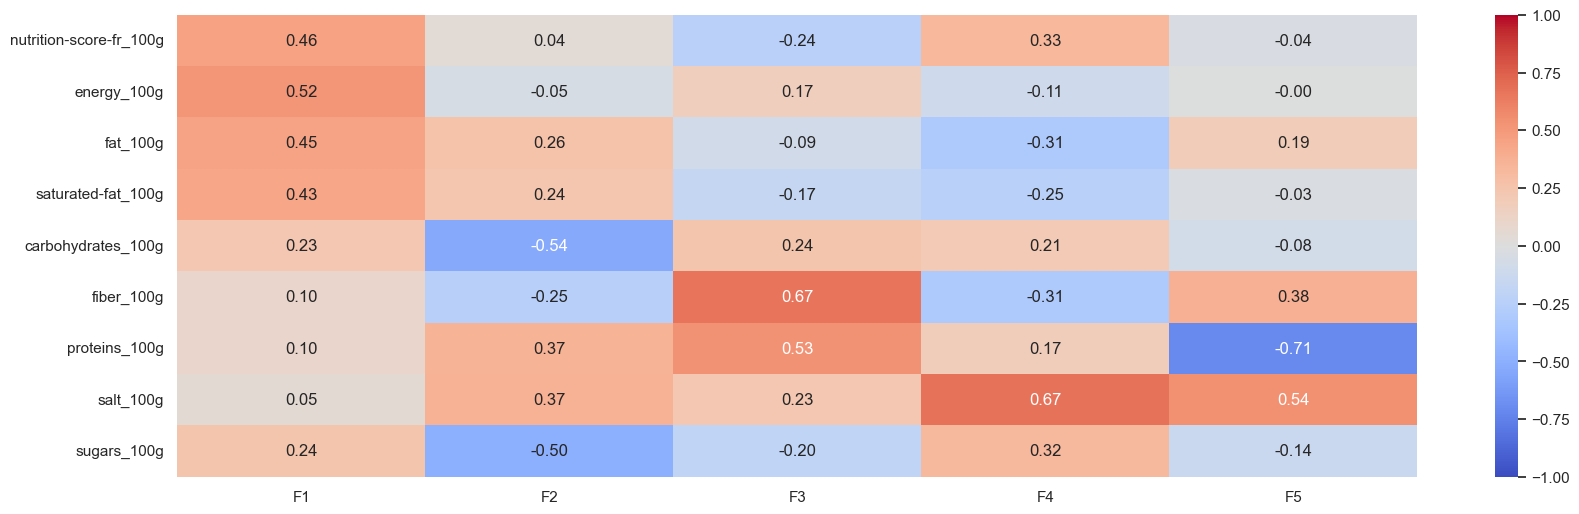

In [58]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [59]:
pca.explained_variance_

array([3.19321144, 2.0065742 , 1.26534439, 1.0118596 , 0.60392787])

In [60]:
x, y = 0,1

In [61]:
def cercle_corelation(pca,x,y):
    fig, ax = plt.subplots(figsize=(10, 9))
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0,
                 0,  # Start the arrow at the origin
                 pca.components_[x, i],  #0 for PC1
                 pca.components_[y, i],  #1 for PC2
                 head_width=0.07,
                 head_length=0.07, 
                 width=0.02,              )

        plt.text(pca.components_[0, i] + 0.05,
                 pca.components_[1, i] + 0.05,
                 features[i])

    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')


    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.show(block=False)


In [62]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [63]:
# correlation_graph(pca,(2,3),features)

<AxesSubplot:>

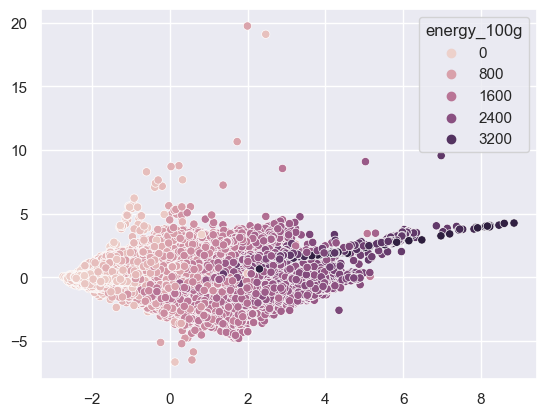

In [64]:
X_proj = pca.transform(X_scaled)
X_proj.shape
sns.scatterplot(data=None, x=X_proj[:, x], y=X_proj[:, y], hue=df['energy_100g'])

In [65]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



In [66]:
X_scaled2 = pca.inverse_transform(X_proj)
pd.DataFrame(scaler.inverse_transform(X_scaled2),columns=df.select_dtypes(include=np.number).columns)

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,5.966372,355.284342,3.066786,1.453278,14.773594,-1.071074,0.094654,0.355357,15.184638
1,5.985369,359.365163,3.108232,1.388991,14.915379,-0.985748,0.082445,0.428058,15.035745
2,14.010892,1584.049240,16.421930,7.303525,49.680934,2.656421,6.292568,0.649859,29.229467
3,13.919240,1537.340329,14.219745,6.345855,52.143966,2.608074,6.046717,0.672027,31.043393
4,13.981599,1453.997941,10.531812,4.891542,56.614204,2.313899,5.052626,0.560165,35.283164
...,...,...,...,...,...,...,...,...,...
37790,5.853242,896.339631,0.480403,-0.291011,49.005529,2.856345,2.320586,-0.087197,27.714774
37791,4.075793,944.709899,0.784529,-0.791766,51.042245,4.128100,2.108452,-0.109702,25.493890
37792,8.926756,1835.508161,25.159075,8.620632,41.531514,6.809428,8.496069,1.439114,10.436505
37793,0.593579,1331.339952,3.142129,-0.591816,55.127424,7.756722,14.166564,0.465957,12.094071


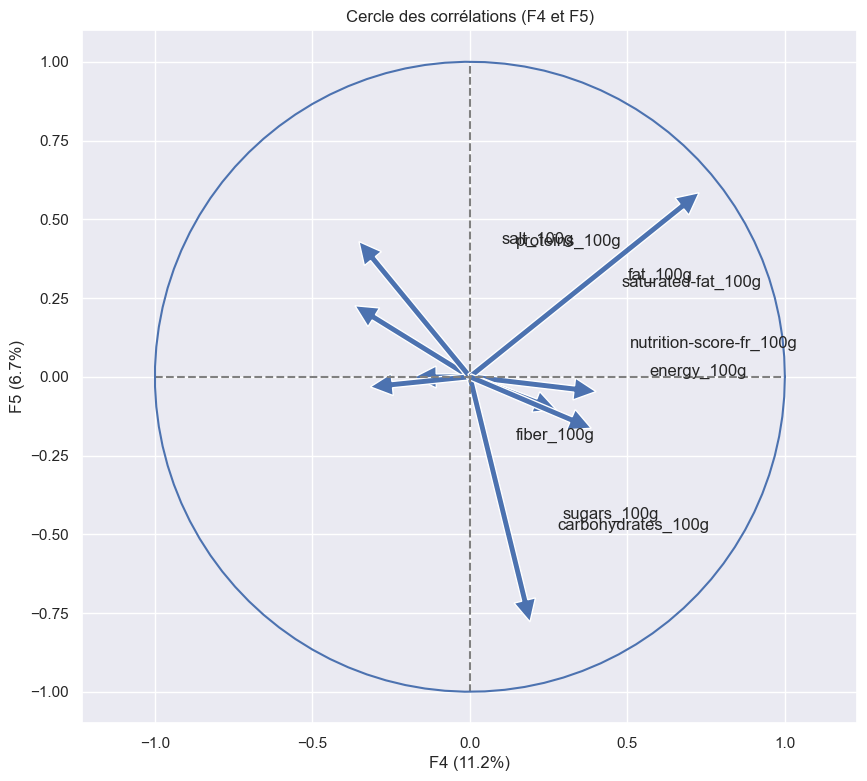

In [67]:
x, y = 3,4
cercle_corelation(pca,x,y)

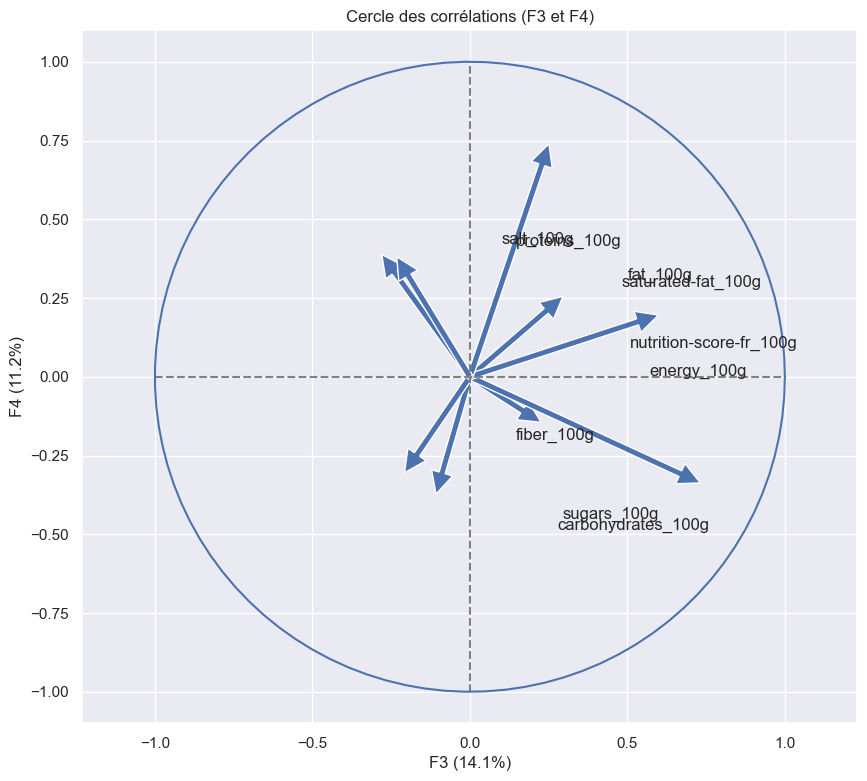

In [68]:
x, y = 2,3
cercle_corelation(pca,x,y)

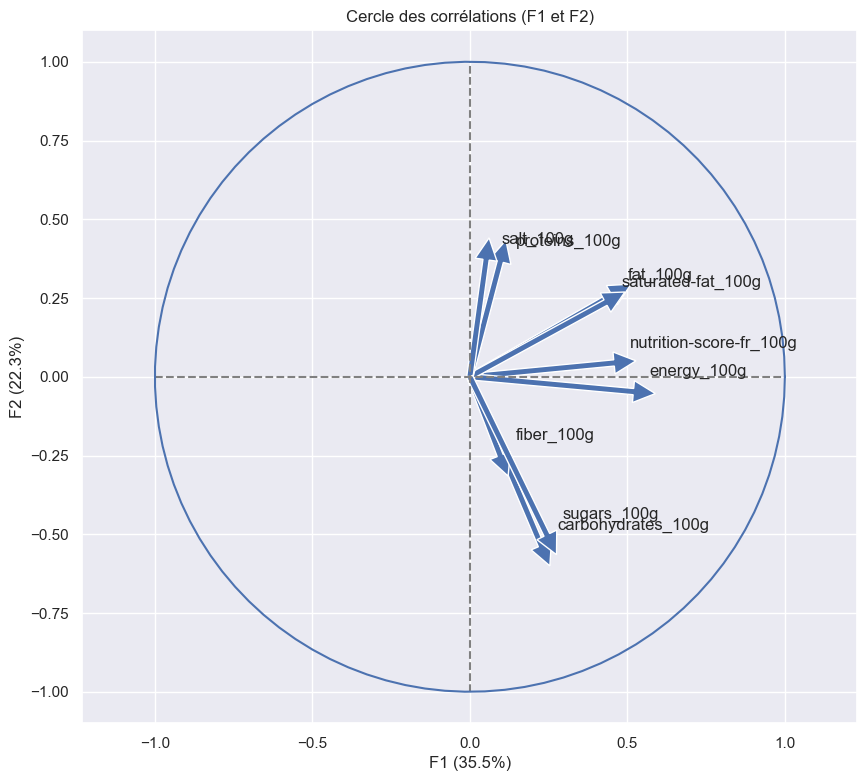

In [69]:
x, y = 0,1
cercle_corelation(pca,x,y)

In [70]:
X_proj.shape[1]

5

In [71]:
# Calcul de la qualité de la représentation des individus

total_dist = np.sum(X_scaled **2,axis=1)
cos2 = X_proj**2
for j in range(X_proj.shape[1]):
    cos2[:,j] = cos2[:,j]/total_dist

print(pd.DataFrame({'id':df.index, 'COS2_1':cos2[:,0], 'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2]}))

          id    COS2_1    COS2_2    COS2_3
0          0  0.377197  0.019438  0.397665
1          1  0.381650  0.018388  0.386849
2          2  0.427199  0.273575  0.002097
3          3  0.379271  0.395250  0.002171
4          4  0.225327  0.553848  0.011529
...      ...       ...       ...       ...
37790  37790  0.034599  0.318482  0.001954
37791  37791  0.042178  0.371080  0.004980
37792  37792  0.300894  0.004847  0.325665
37793  37793  0.013268  0.149068  0.625163
37794  37794  0.763485  0.002758  0.173312

[37795 rows x 4 columns]


In [72]:
X_proj[:,0].max()

8.847201597420431

In [73]:
# calcul de la contribution des individu (vi*Pi*Pi*vi) / (n*eigenvalue)

n = X_proj.shape[0]
p = X_proj.shape[1]
ctr = X_proj**2

for j in range(p):
    ctr[:,j] = ctr[:,j]/(eigenvalues[j])

CTR = pd.DataFrame({'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3],'CTR_5':ctr[:,4]})
CTR[CTR['CTR_1']> 1]

,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5
5,1.546959,0.416274,0.200829,0.399938,7.495543
6,1.608515,0.338682,0.061636,0.361185,2.171262
8,3.012209,0.178850,0.488464,0.329493,0.012599
9,1.743791,0.635800,0.008028,0.067102,0.152748
12,1.128914,0.015028,0.439677,0.039431,11.154148
...,...,...,...,...,...
37767,17.387804,7.158709,6.812853,21.260521,36.235804
37777,1.816754,0.002979,0.702487,0.325783,2.662445
37784,1.220375,0.009772,0.646420,0.137333,0.009020
37788,8.197940,3.081559,3.248680,10.333975,47.233303


In [74]:
pca.components_

array([[ 0.45760595,  0.51919045,  0.45083509,  0.43070599,  0.22664858,
         0.09617148,  0.09648014,  0.05144313,  0.24434563],
       [ 0.04385257, -0.04714918,  0.25910548,  0.23540017, -0.5359197 ,
        -0.25000222,  0.36543389,  0.37158872, -0.50197   ],
       [-0.23866835,  0.16704041, -0.0880589 , -0.16787357,  0.24239801,
         0.668243  ,  0.53241038,  0.22831382, -0.19571791],
       [ 0.33127257, -0.10695934, -0.3050702 , -0.24657343,  0.20918738,
        -0.30776674,  0.17423369,  0.67312594,  0.32096148],
       [-0.03894196, -0.0008137 ,  0.18865569, -0.02504237, -0.07988128,
         0.37515704, -0.71024624,  0.54050138, -0.13619652]])

In [76]:
# calcul de l areprésentation des variables

sqrt_eigenvalues = np.sqrt(eigenvalues)
corvar = np.zeros((9,5))
corvar
for i in range(5): corvar[:,i] = pca.components_[i,:]*sqrt_eigenvalues[i]

    
cos2_var = corvar**2

pd.DataFrame({'COR_1':cos2_var[:,0],'COR_2' : cos2_var[:,1],'COR_3' : cos2_var[:,2],'COR_4' : cos2_var[:,3],'COR_5' : cos2_var[:,4]})

,COR_1,COR_2,COR_3,COR_4,COR_5
0,0.668651,0.003859,0.072075,0.111040,3.787646e-05
1,0.860735,0.004461,0.035305,0.011576,1.653716e-08
2,0.649010,0.134709,0.009812,0.094169,8.889422e-04
3,0.592349,0.111188,0.035658,0.061518,1.566335e-05
4,0.164030,0.576293,0.074346,0.044277,1.593763e-04
5,0.029533,0.125410,0.565023,0.095841,3.515280e-03
6,0.029723,0.267955,0.358666,0.030717,1.259945e-02
7,0.008450,0.277057,0.065957,0.458460,7.296714e-03
8,0.190645,0.505591,0.048468,0.104235,4.633036e-04


In [78]:
# Calcul de la contribution des variables 

ctrvar = cos2_var

for i in range(5): ctrvar[:,i] = ctrvar[:,i]/eigenvalues[i]


pd.DataFrame({'CTR_1':ctrvar[:,0],'CTR_2' : ctrvar[:,1],'CTR_3' : ctrvar[:,2],'CTR_4' : ctrvar[:,3],'CTR_5' : ctrvar[:,4]})

,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5
0,0.209403,0.001923,0.056963,0.109742,1.516477e-03
1,0.269559,0.002223,0.027902,0.011440,6.621056e-07
2,0.203252,0.067136,0.007754,0.093068,3.559097e-02
3,0.185508,0.055413,0.028182,0.060798,6.271205e-04
4,0.051370,0.287210,0.058757,0.043759,6.381019e-03
5,0.009249,0.062501,0.446549,0.094720,1.407428e-01
6,0.009308,0.133542,0.283461,0.030357,5.044497e-01
7,0.002646,0.138078,0.052127,0.453099,2.921417e-01
8,0.059705,0.251974,0.038306,0.103016,1.854949e-02


In [79]:
from sklearn.cluster import KMeans

In [80]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [81]:
X_scaled2 = X_proj
X_scaled2

array([[-1.35646202, -0.30792455, -1.39277888,  0.15774439,  0.09676588],
       [-1.35077182, -0.29649431, -1.35994203,  0.1830078 ,  0.13659727],
       [ 1.19150144, -0.95349362, -0.08347629,  0.31363812, -0.07011355],
       ...,
       [ 1.2658459 , -0.16065907,  1.31692064, -0.47049313,  0.77848619],
       [-0.33350143, -1.1178468 ,  2.28921204, -0.31859086, -0.26354365],
       [-2.19768155,  0.13207684, -1.04707819, -0.4870219 ,  0.22272031]])

In [82]:
k  = range(1,30)
inertia = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(X_scaled2)
    inertia.append(model.inertia_)
inertia

[305410.19578530453,
 216366.12723920634,
 172283.67447398833,
 146231.29781012397,
 122582.93676112239,
 110437.92617130405,
 98599.52000200615,
 93484.80212770181,
 81664.58738650067,
 75170.77100675416,
 70340.15928514733,
 66167.3334877245,
 62459.93686340501,
 58985.593227412035,
 55622.96529903786,
 52671.54585053597,
 50636.555968408444,
 48752.01427358943,
 47137.36575713916,
 44923.5977111037,
 43202.09431985118,
 41793.54208955796,
 40634.891368454875,
 39292.017834334554,
 38160.42367196625,
 37248.319854583795,
 36334.602857906546,
 35273.28263581169,
 34426.21822484417]

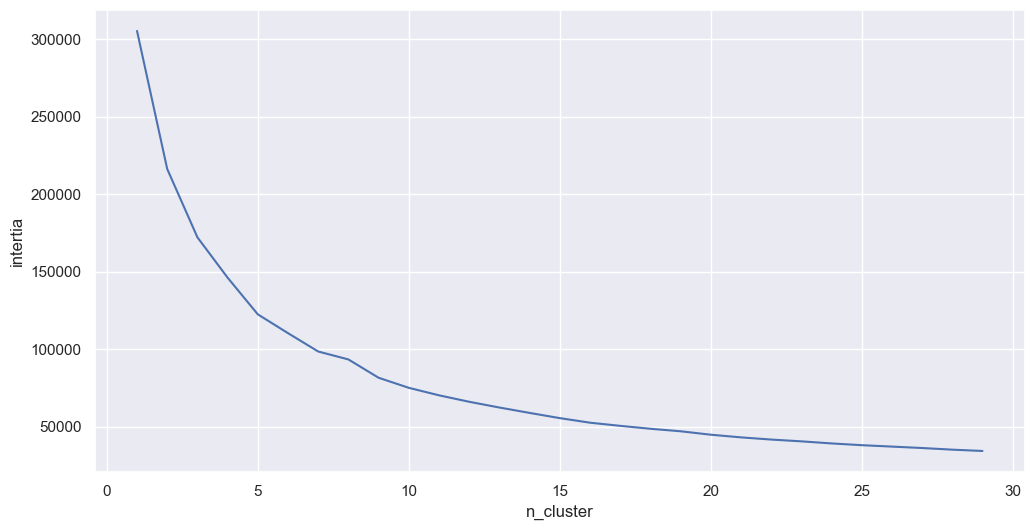

In [83]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k, inertia)

In [84]:
k  = range(1,9)
inertia = []
clust_centers = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(X_scaled2)
    inertia.append(model.inertia_)
    clust_centers.append(model.cluster_centers_)
inertia


[305410.19578530453,
 216366.35799779187,
 172284.03725613802,
 146233.86577102038,
 122582.93676112237,
 110437.88654872324,
 98599.54095398475,
 88873.8824894854]

In [85]:
#print(clust_centers[7])
model.predict(X_scaled2)



array([2, 2, 3, ..., 4, 4, 2])

In [86]:
model.labels_

array([2, 2, 3, ..., 4, 4, 2])

In [87]:
model.cluster_centers_

array([[ 8.85661098e-01, -2.84613360e+00, -5.97879890e-01,
         1.22057036e+00, -3.36046145e-01],
       [ 1.33828714e+00,  2.12557831e+00,  1.24984206e-01,
         1.88903111e-01, -4.60808050e-01],
       [-1.58835932e+00, -6.22885591e-02, -5.77237072e-01,
        -2.57327265e-01,  2.30832640e-01],
       [ 2.32766949e+00, -7.98840957e-01, -1.04092010e-01,
         1.73028307e-01,  2.40642576e-02],
       [-1.07912960e-01, -1.05041991e+00,  1.82533073e+00,
        -3.86013122e-01,  1.04339041e-02],
       [ 4.03329149e+00,  1.97079401e+00, -1.37741952e+00,
        -2.27006870e+00,  1.08422801e+00],
       [-7.74564559e-01,  1.28224860e+00,  4.82440554e-01,
         5.02494376e-01, -5.37863860e-01],
       [-1.76855710e-03,  4.98970008e+00,  2.45984148e+00,
         8.28703192e+00,  5.95074902e+00]])

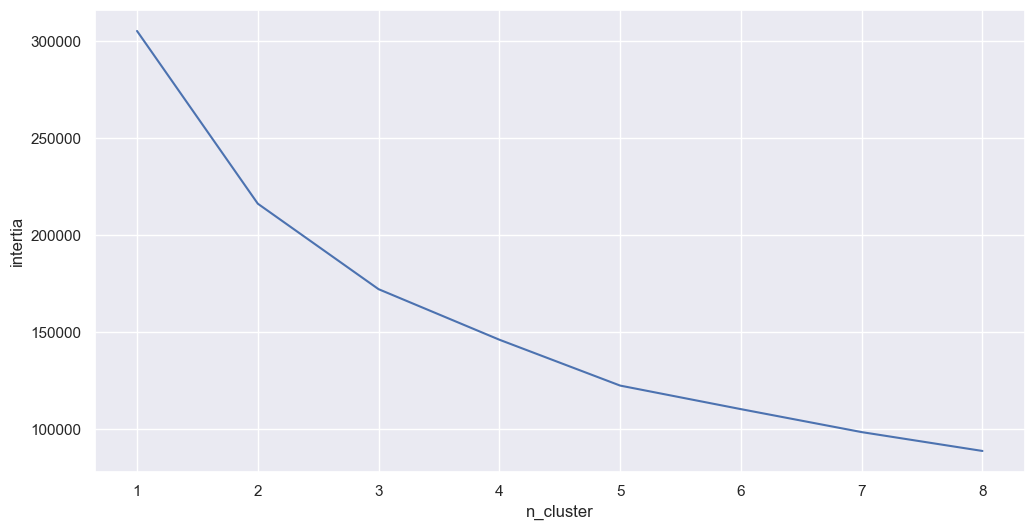

In [88]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k, inertia)

In [89]:
k  = range(1,6)
inertia = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(X_scaled2)
    inertia.append(model.inertia_)
inertia

[305410.19578530453,
 216366.18701464747,
 172284.03725613802,
 146231.36246125912,
 122583.03194838262]

In [90]:
X = pd.DataFrame({'F1':X_scaled2[:,0],'F2':X_scaled2[:,1],'F3':X_scaled2[:,2],'F4':X_scaled2[:,3],'F5':X_scaled2[:,4]})
X["cluster"] = model.labels_
X['cluster'].unique()

array([0, 4, 3, 2, 1])

In [91]:
X

,F1,F2,F3,F4,F5,cluster
0,-1.356462,-0.307925,-1.392779,0.157744,0.096766,0
1,-1.350772,-0.296494,-1.359942,0.183008,0.136597,0
2,1.191501,-0.953494,-0.083476,0.313638,-0.070114,4
3,1.089668,-1.112386,-0.082439,0.443919,-0.085341,4
4,0.933563,-1.463634,-0.211173,0.626803,-0.146347,4
...,...,...,...,...,...,...
37790,-0.579343,-1.757697,-0.137665,0.126683,-0.041541,0
37791,-0.631946,-1.874436,0.217135,-0.096982,0.143435,2
37792,1.265846,-0.160659,1.316921,-0.470493,0.778486,2
37793,-0.333501,-1.117847,2.289212,-0.318591,-0.263544,2


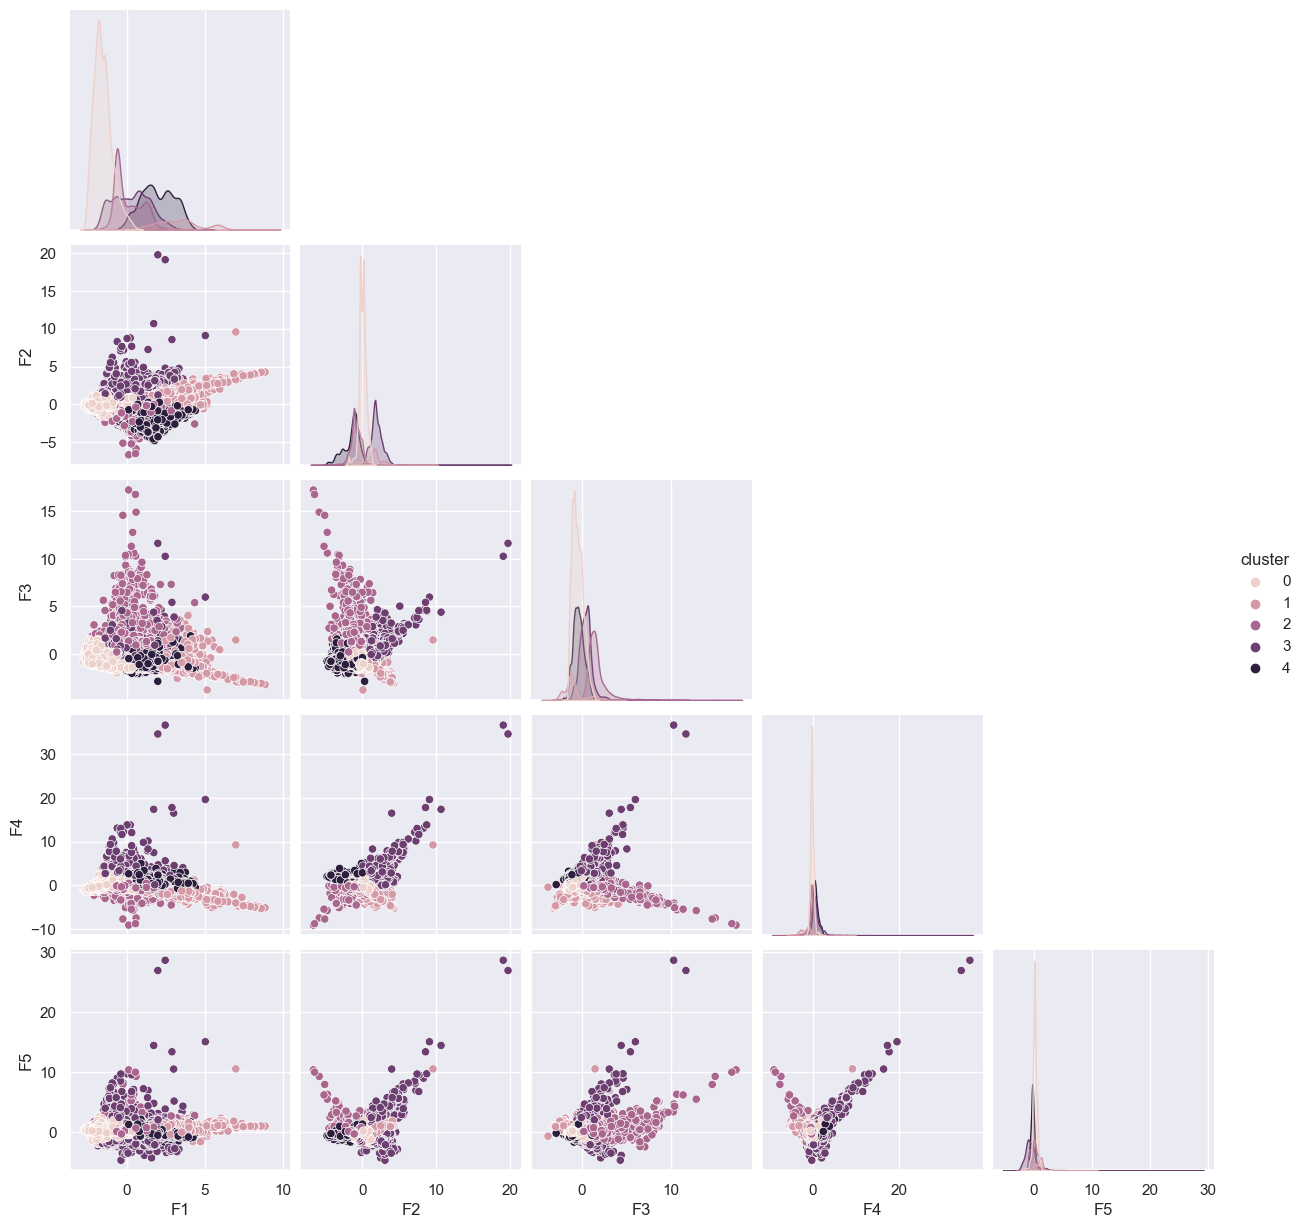

In [92]:
sns.pairplot(data = X , hue = 'cluster',corner = True)

<AxesSubplot:xlabel='F1', ylabel='F2'>

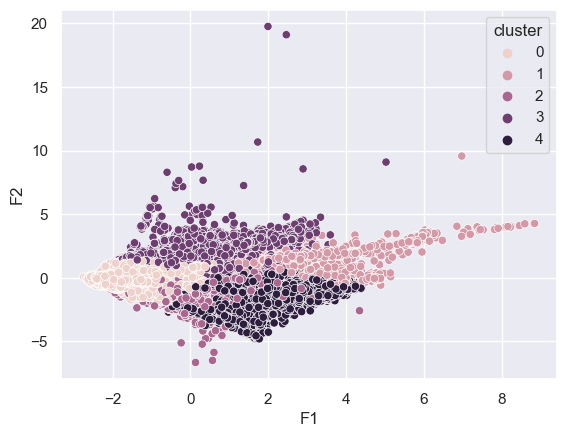

In [93]:
sns.scatterplot(data =  X, x='F1', y = 'F2', hue = 'cluster' )

# Modeling

Objectif : Développer un modèle de machine learning qui réponde a l'objectif final 

- Définir une fonction d'évaluation
- Entrainement de différents modèles 
- Optimisation avec GridSearchCV
- (optionnel) analysde des erreurs et retour au Preprocessing / EDA
- Learning Curve et prise de décision